In [ ]:
# 코랩 한글 설치, 런타임 다시 시작 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
!pip install pyproj -q

     |████████████████████████████████| 6.3 MB 5.5 MB/s 


In [34]:
# 전처리 라이브러리
import pandas as pd
import numpy as np
import os

# 작업 진행바 불러오기
from tqdm import tqdm

# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

# 지도 시각화
import json
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
from folium.features import DivIcon

# 지도 좌표계
from pyproj import Proj, transform

In [35]:
seoul_geo = json.load(open('/content/drive/Shareddrives/강서구/220315 DrawMap/집계구.json'))

proj_UTMK = Proj(init='epsg:5179')
proj_WGS84 = Proj(init='epsg:4326')

gangsu_list = []
for i in seoul_geo['features']:
  if i['properties']['ADM_CD'].startswith('11160'): # 강서구 데이터인 경우에만
    points = np.array(i['geometry']['coordinates'][0]) # 좌표값 추출

    x,y = points[:,0].tolist(), points[:,1].tolist() # 경도 위도 각각 추출
    new_x, new_y = transform(proj_UTMK, proj_WGS84, x, y) # 좌표계 변환
    new_points = np.column_stack((new_x, new_y)) # 다시 열 병합

    i['geometry']['coordinates'][0] = new_points.tolist() # json 저장을 위한 리스트 변환
    gangsu_list.append(i) # json 데이터에 대입
gangsu_geo = seoul_geo.copy() # 강서구용을 위해 데이터 복사
gangsu_geo['features'] = gangsu_list # 강서구 데이터 생성

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  if sys.path[0] == 

In [38]:
with open('/content/drive/Shareddrives/강서구/using_data/강서구_집계구.json', 'w') as outfile:
    json.dump(gangsu_geo, outfile)

In [50]:
df = pd.read_csv('/content/drive/Shareddrives/강서구/using_data/생활인구.csv')

Text(0, 0.5, '중고거래횟수')

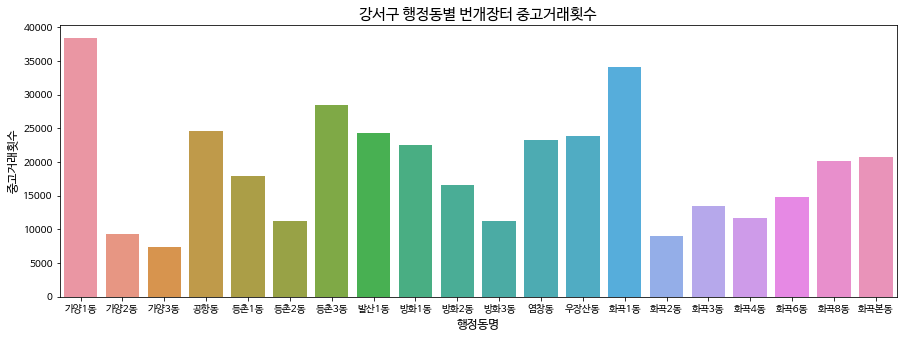

In [51]:
plt.figure(figsize=(15, 5), facecolor="white")
sns.barplot(x='동', y='10-60세_생활', data=df)
plt.title('강서구 행정동별 번개장터 중고거래횟수', fontsize=15)
plt.xlabel('행정동명', fontsize=12)
plt.ylabel('중고거래횟수', fontsize=12)

In [42]:
# 강서구 지도 시각화
m = folium.Map(location=[37.56,126.83], zoom_start=13, tiles='cartodbpositron')

# 강서구 20,40,50대 여성 평균 생활인구 시각화
f = folium.Choropleth(geo_data=gangsu_geo,
                    data=df, 
                    columns = df.columns,
                    key_on='feature.properties.ADM_NM',
                    fill_color='YlGn',
                    fill_opacity=0.7,
                    line_opacity=0.3,
                    legend_name="10~60세 생활인구수(명)",
                    name = '강서구 집계구 지도').add_to(m)

# 범례 생성
folium.LayerControl(collapsed=False).add_to(m)

# 행정동명 이름 나오게
f.geojson.add_child(folium.features.GeoJsonTooltip(['ADM_NM'], labels=False))

m

Output hidden; open in https://colab.research.google.com to view.

In [44]:
m.save('/content/drive/Shareddrives/강서구/220324 EDA_Final/생활인구_지도.html')

In [45]:
df = pd.read_csv('/content/drive/Shareddrives/강서구/using_data/주민등록.csv')
# 강서구 지도 시각화
m = folium.Map(location=[37.56,126.83], zoom_start=13, tiles='cartodbpositron')

# 강서구 20,40,50대 여성 평균 생활인구 시각화
f = folium.Choropleth(geo_data=gangsu_geo,
                    data=df, 
                    columns = df.columns,
                    key_on='feature.properties.ADM_NM',
                    fill_color='YlGn',
                    fill_opacity=0.7,
                    line_opacity=0.3,
                    legend_name="10~60세 주민등록인구수(명)",
                    name = '강서구 집계구 지도').add_to(m)

# 범례 생성
folium.LayerControl(collapsed=False).add_to(m)

# 행정동명 이름 나오게
f.geojson.add_child(folium.features.GeoJsonTooltip(['ADM_NM'], labels=False))

m

Output hidden; open in https://colab.research.google.com to view.

In [46]:
m.save('/content/drive/Shareddrives/강서구/220324 EDA_Final/주민등록_지도.html')

Text(0, 0.5, '중고거래수')

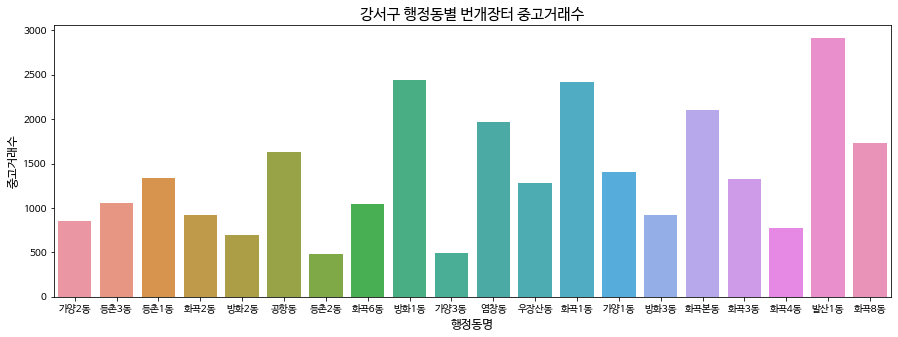

In [56]:
df = pd.read_csv('/content/drive/Shareddrives/강서구/using_data/중고거래.csv')
plt.figure(figsize=(15, 5), facecolor="white")
sns.barplot(x='동', y='중고거래횟수', data=df)
plt.title('강서구 행정동별 번개장터 중고거래수', fontsize=15)
plt.xlabel('행정동명', fontsize=12)
plt.ylabel('중고거래수', fontsize=12)

In [49]:
df.sum()

동         가양2동등촌3동등촌1동화곡2동방화2동공항동등촌2동화곡6동방화1동가양3동염창동우장산동...
중고거래횟수                                                27806
dtype: object

Text(0, 0.5, '승하차수')

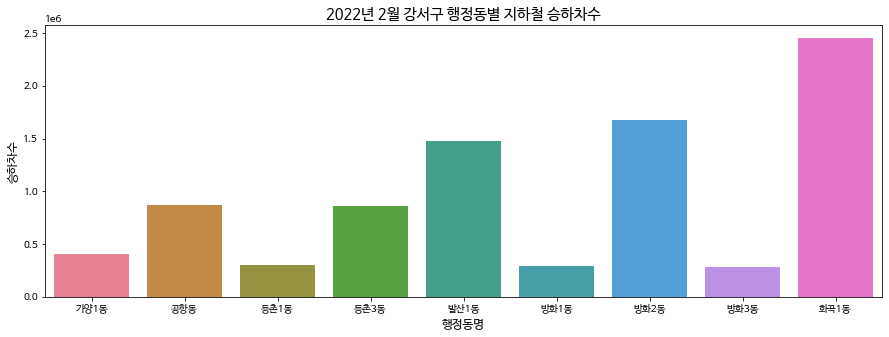

In [24]:
df = pd.read_csv('/content/drive/Shareddrives/강서구/using_data/지하철_승하차.csv')
plt.figure(figsize=(15, 5), facecolor="white")
sns.barplot(x='동', y='승하차수', data=df, palette='husl')
plt.title('2022년 2월 강서구 행정동별 지하철 승하차수', fontsize=15)
plt.xlabel('행정동명', fontsize=12)
plt.ylabel('승하차수', fontsize=12)